# Probabilistic Machine Learning
<div style="text-align: right"> University of Tübingen, Summer Term 2023  &copy; 2023 P. Hennig </div>

## Exercise Sheet No. 1 — Setting Up

---

Submission by:
* Batuhan, Oezcoemlekci, Matrikelnummer: 6300476
* Aakarsh, Nair, Matrikelnummer: 6546577

Assume that, if A is true, B becomes more plausible. That is,
P(B|A) ≥ P(B).

Using the rules of probability (sum rule and product rule) as stated in the lecture, show
the following relationships (stated in the lecture without proof)

NOTE that sum and product rule implies the Bayes' Rule. Also note that any probability is between [0,1].  

(a) P(B|¬A) ≤ P(B) (“If A is false, B becomes less plausible”)

$$P(B|A) ≥ P(B)$$
$$P(B,A)/P(A) ≥ P(B)$$
$$P(A|B)P(B)/P(A) ≥ P(B)$$
$$1-P(A|B) ≤ 1-P(A)$$
$$P(¬A|B) ≤ P(¬A)$$
$$P(B|¬A)P(¬A)/P(B) ≤ P(¬A)$$
$$P(B|¬A)/P(B) ≤ 1$$
$$P(B|¬A) ≤ P(B)$$ 
$$ QED $$


**Longer Variation**


We have been given that $P(B|A) \geq P(B)$, we start by exploring the consequences of this.

Using the *law of total probability* we know that: 

\begin{equation}
    P(B) = P(A) P(B|A) + (1 - P(A)) P(B| \neg A)
\end{equation}


Where we additionally used that $P(\neg A) = (1 - P(A)$. 

Substituting in our given inequality we see that: 

\begin{equation}
    P(B|A) \geq P(A) P(B|A) + (1 - P(A)) P(B| \neg A)
\end{equation}

Simplifying we get the inequality:

\begin{equation}
    (1 - P(A)) P(B|A) \geq (1 - P(A)) P(B | \neg A)
\end{equation}

We assume $P(A) \neq 1$, and we know that $P(A) \leq 1$, by virtue of being a probability distribution.

Thus dividing by $(1-P(A))$ on both sides leaves the inequality unaltered, we get: 

\begin{equation}
    P(B|A) \geq P(B | \neg A)
\end{equation}

or $P(B|A)  - P(B| \neg A) \geq 0$


Now we revisit the law of total probability:
\begin{equation}
    P(B) = P(B|A)P(A) + (1 - P(A)) P(B|\neg A)
\end{equation} 

simplifying we get 

$$P(B) = P(B|A)P(A)  - P(B| \neg A) P(A) + P(B | \neg A)$$

Consider the first two terms combined as $P(A) (P(B|A) - P(B| \neg A))$. From before we have $P(A) \geq 0 $ and $P(B|A) - P(B| \neg A) \geq 0$. Thus the combined term 
$P(A) (P(B|A) - P(B| \neg A)) \geq 0$. Let $\delta  = P(A) (P(B|A) - P(B| \neg A)) $ then we have $\delta \geq 0$. 

In our expression we have 

$$P(B) = \delta + P(B| \neg A) , \delta \geq 0$$

Giving us the inequality we need,  $P(B) \geq P(B | \neg A)$


(b) P(A|B) ≥ P(A) (“If B is true, A becomes more plausible”)

$$P(B|A) ≥ P(B)$$
$$P(B,A)/P(A) ≥ P(B)$$
$$P(A|B)P(B)/P(A) ≥ P(B)$$
$$P(A|B)P(B) ≥ P(B)P(A)$$
$$P(A|B) ≥ P(A)$$ 
$$ QED$$


**Long Variation**

We have been given that, $P(B|A) \geq P(B)$, that is if $A$ is true then $B$, 
becomes more plausible. We can use Bayes' Theorem to rewrite $P(B|A)$ in terms 
of $P(A|B)$ we note the two are related as 

\begin{equation}
    P(B|A) = \frac{P(A|B)P(B)}{P(A)}
\end{equation}

We can substitute this expression for $P(B|A)$ in our given inequality 
$P(B|A) \geq P(B)$  we get: 

$$ \frac{P(A|B)P(B)}{P(A)} \geq P(B) $$

Multiply both sides of our given inequality by $\frac{P(A)}{P(B)}$, 
assuming $P(B) \neq 0$, this fraction is positive as both values 
probabilities.

This gives us:

\begin{equation}
    P(A|B) \geq P(A)
\end{equation}


(c) P(A|¬B) ≤ P(A) (“If B is false, A becomes less plausible”)

$$Starting from the result of (b)$$
$$P(A|B) ≥ P(A)$$
$$P(A,B)/P(B) ≥ P(B)$$
$$P(B|A)P(A)/P(B) ≥ P(A)$$
$$1-P(B|A) ≤ 1-P(B)$$
$$P(¬B|A) ≤ P(¬B)$$
$$P(A|¬B)P(¬B)/P(A) ≤ P(¬B)$$
$$P(A|¬B)/P(A) ≤ 1$$
$$P(A|¬B) ≤ P(A)$$ 
$$ QED $$

**Long Version** 

From the previous questions we have that , given $P(B|A) \geq P(B)$, $P(A|B) \geq P(A)$,  thus 
our argument for $P(A| \neg B) \leq P(B)$ is symmetric to the argument in the first problem but with 
the variables $A$ and $B$ switched. We only reproduce it here for completeness.

Consider the expression $P(A|B) \geq P(A)$, from the law of total probability for $P(A)$ we have: 

\begin{equation}
    P(A|B)  \geq P(A|B) P(B) + P(A | \neg B) (1 - P(B)
\end{equation}

We additionally used $P(\neg B) = 1 - P(B)$. 

Thus factoring and rearranging the terms we get. 

\begin{equation}
    P(A|B) ( 1 - P(B) \geq P(A| \neg B) ( 1 - P(B)
\end{equation}

Assuming $ P(B) \leq 1 $ , we also know that $P(B) \geq 0$, 
we get.

The previous inequality simplifies to : 

\begin{equation}
    P(A|B)  \geq P(A | \neg B)
\end{equation}

Thus let $\gamma = P(A|B)  -  P(A | \neg B)$ then we have $\gamma \geq 0$.

Revisiting the law of total probability for $P(A)$, we have

\begin{equation}
    P(A) = P(A| B) P(B) + P(A| \neg B) (1 - P(B))
\end{equation}

Re-arranging the terms we have
\begin{equation}
    P(A) = P(B)(P(A|B) - P(A|\neg B)) + P(A|\neg B)
\end{equation}
As both $P(B) \geq 0 $  and $\gamma  = P(A|B)  - P(A|\neg B) \geq 0 $ we thus have $P(B) \gamma \geq 0 $

\begin{equation}
    P(A) = P(B) \gamma + P(A|\neg B)
\end{equation}

Thus $P(A | \neg B) \leq P(A)$.


Additionally show that probabilistic reasoning includes Boolean logic as a special case, by
showing that if A ⇒ B is interpreted as equivalent to P(B | A) = 1, then the following
three statements hold:

(d) P(¬A | ¬B) = 1 (“modus tollens”)

$$P(B | A) = 1$$
$$P(¬B | A) = 0$$
$$P(A|¬B)P(¬B)/P(A) = 0$$
$$P(A|¬B)P(¬B) = 0$$
$$P(A|¬B)P(¬B)/ = 0$$


**Long Variation**

We start with the given statement $$P(B|A)=1$$ from the law of total 
probability for binary variables A, B we have:

$$P(B | A) + P(\neg B | A) = 1$$

Thus $P(\neg B | A ) = 0$. 

However we can write an expression for the term $P(A|\neg B)$ in terms of $P(\neg B|A)$ using 
bayes theorem as follows: 

\begin{equation}
P(A| \neg B) = \frac{P(\neg B|A) P(A)}{P(\neg B)}
\end{equation}

It follows then that $P(A| \neg B) = 0$. 

From the law of total probability we know that: 
$$P(\neg A| \neg B) + P( A | \neg B) = 1$$

Thus it follows that as $P(A| \neg B) = 0$ that $P(\neg A | \neg B) = 1$.


(e) P(B | ¬A) ≤ P(B) (“If A is false, B becomes less plausible”)


**Long Variation**

We know from the law of probability that 
\begin{equation}
P(B) = P(B|A) P(A) + P(B| \neg A) P(\neg A)
\end{equation}

As shown previously we can rewrite the above expression as

\begin{equation}
P(B) = P(A) (P(B|A) - P(B | \neg A)) + P(B|\neg A)
\end{equation}

If we let $\delta = P(B|A) - P(B| \neg A)$ we have been given that $P(B|A)=1$, thus if we can show that $P(B|\neg A) = 0$ then $\delta = 1$. 

From the previous part we know that $P(\neg B | \neg A) = 1$, we also that thus that

$$P(\neg B | \neg A)  + P( B | \neg A)  = 1$$

Thus we have $P(B| \neg A) = 0$. Substituting in the equation fro total probability of B we get: 

\begin{equation}
P(B) = P(A) (1 - 0) + P(B|\neg A)
\end{equation}

As $P(A) \geq 0$ from the fact that $P(A)$ is a probability distribution,  
we have $P(B) \geq P(B| \neg A)$ which can be restated as 
$P(B|\neg A) \leq P(B)$.

(f) P(A | B) ≥ P(A) (“if B is true, A becomes more plausible”)

We have been given that $P(B|A) = $, thus we can write an expression for $P(A|B)$ as follows: 

\begin{equation}
P(A|B) = \frac{P(B|A) P(A)}{P(B)} = \frac{P(A)}{P(B)}
\end{equation}

Assuming that $P(B) \neq 0$ as we know that $P(B) \in [0,1]$ we know that 

$$P(A) \leq \frac{P(A)}{P(B)}$$

in other words we have $P(A) \leq P(A|B)$ , that is $P(A |B) \geq P(A)$. 

In [10]:
from io import StringIO

import pandas as pd
import requests
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np
import logging

from tueplots import bundles
from tueplots.constants.color import rgb

logging.getLogger('matplotlib.font_manager').disabled = True
plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 200})

# Exercise 1.2 (Coding Exercise)

This week's exercise serves as an opener for the course. As a first step, make sure the cell above this works for you. This is mostly to ensure you have `jax` and `tueplots` installed in your local environment, which we will use across the course. If you get errors, try a `pip install jax tueplots pandas`. Consider the well-known Mauna Loa CO$_2$ dataset, which we download directly from [NOAA](https://gml.noaa.gov/ccgg/trends/data.html): 

In [11]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv"
s = requests.get(url).text

df = pd.read_csv(StringIO(s), sep=",", header=51, na_values="-999.99").dropna()
X = df["decimal"]
Y = df["average"]

In [12]:
durations = (X.to_numpy()[1:] - X.to_numpy()[:-1])
print("Minimum Measurement duration", jnp.min(durations) * 365.25)
print("Maximum measurement duration", jnp.max(durations)*365.25)
print("Average measurement duration", jnp.mean(durations)*365.25)

Minimum Measurement duration 5.9901
Maximum measurement duration 42.00375
Average measurement duration 7.1120872


We do a *very* quick and dirty linear regression on this univariate timeseries.

In [14]:
phi = jnp.stack([jnp.ones(len(X)), jnp.asarray(X)])
w = jnp.linalg.solve((phi @ phi.T), phi @ Y)
Ypred_LinReg = w[0] + w[1] * X

def loss(Yhat):
    return jnp.sqrt(((Y - Yhat) ** 2).mean())
print(f"simple linear regression has train RMSE {loss(Ypred_LinReg):0.2f}")

simple linear regression has train RMSE 3.10


And make a nice plot:

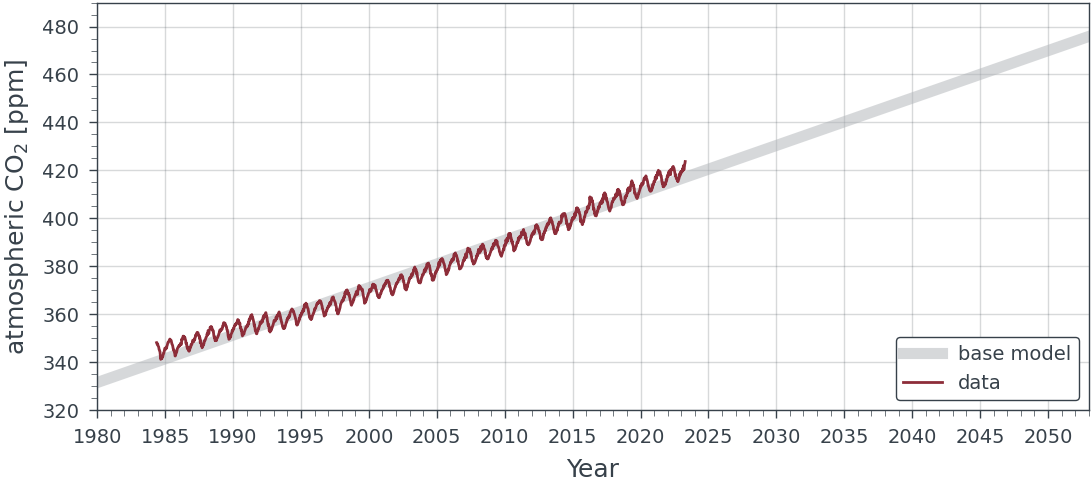

In [31]:
fig, ax = plt.subplots()
x = jnp.linspace(1980, 2053, 200)
ax.plot(x, w[0] + w[1] * x, color=rgb.tue_gray,
        lw=4, alpha=0.5, label="base model")
ax.plot(X, Y, label="data")

ax.set_xlabel("Year")
ax.set_ylabel("atmospheric CO$_2$ [ppm]")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.set_xlim([1980, 2053])
ax.set_ylim([320, 490])
ax.grid(which="major", axis="both")
ax.legend(loc="lower right", framealpha=1, facecolor="w");

## Your Task:

Using your favorite deep learning framework, define and train a supervised (regression) model on this dataset `X,Y`. Use it to predict on the test inputs `x = jnp.linspace(1980, 2053, 200)` from above, i.e. 30 years into the future. Consider the following aspects:
* Does your model interpolate between the data (i.e. does it predict the actual pairs $(x_i,y_i)$ correctly, or just approximately)?
* Which structural aspects of the data does your model capture (e.g., does its extrapolation also capture the seasonal oscillations present in the data?
* Do you know a way to add a form of *confidence* or *uncertainty* to the prediction? Can you make *worst/best-case* and *most likely* predictions for atmospheric CO$_2$ over the next 30 years?

**Note:** There is obviously no unique "correct" answer to this task. The goal of this exercise is to allow you to reflect on what you may have heard in previous courses about state-of-the-art machine learning models and their training. Deep learning is often perceived as having replaced all of machine learning, and it certainly permeates most of it. However, while deep learning models have led to impressive results on applications like natural language processing and computer vision, they remain nontrivial to train and to interpret; and their extrapolatory behaviour can be underwhelming. Much of the lecture course will be dedicated to understanding models, their training and predictive behaviour better, and to transfer much of what we learn with basic models to deep learning. 

Thus, we do not expect you to provide a perfect answer here. Answers will get the "sufficient" mark (i.e. the associated bonus point in the exam) if they 
* correctly define any model with at least one nonlinearity
* train the model such that its RMSE on the train set (as defined above) is *smaller* than that of linear regression. 
* amend the plot above with the model's prediction on the testset `x` (not the train set!)

# Correctly Define Any Model with at Least One Nonlinearity


In [3]:
import torch.nn as nn
import torch.optim as optim

### Data Exploration

First we observe that the data is collected with the average duration of 7 days but it varies occasionally, due to 
environmental factors. 

In [16]:
durations = (X.to_numpy()[1:] - X.to_numpy()[:-1])
mean_duration_days = int(jnp.mean(durations)*365.25)
print("Mininimum Measurement duration", jnp.min(durations) * 365.25, "days")
print("Maximum measurement duration", jnp.max(durations)*365.25, "days")
print("Average measurement duration",  mean_duration_days, "days")

Mininimum Measurement duration 5.9901 days
Maximum measurement duration 42.00375 days
Average measurement duration 7 days


## Data Preperation

As we are given a weeks worth of data we try to split the data into segments of 7 
and try to predict the next element in the sequence using the previous 6. We create 
a sliding window over the data set and use this to train a MLP with 4, 8, 32 hidden 
units respectively and try to quantify the loss based on mean square error. 


As we are looking at weekly day, we train the MLP on an years worth of input samples, using a sliding window approach. Thus the starting day will anchor part of the year where as the rest of the days will how usage across the year. Thus we need to create an MLP which takes an input of size 52,  approximately the number of weeks in an year an output the regressed value for the next week.

## LSTM Experiments

While training the neural network we ran into a problem with training them thus we reconstituted it to try use the LSTM architecture for training problem.


In [17]:
import torch
 
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X, dtype=torch.float32).reshape(len(X), lookback, 1), torch.tensor(y, dtype=torch.float32).reshape(len(y), lookback, 1)

In [18]:
lookback = 250
timeseries = Y.to_numpy()
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([1090, 250, 1]) torch.Size([1090, 250, 1])
torch.Size([410, 250, 1]) torch.Size([410, 250, 1])


/tmp/ipykernel_203339/3761457459.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  return torch.tensor(X, dtype=torch.float32).reshape(len(X), lookback, 1), torch.tensor(y, dtype=torch.float32).reshape(len(y), lookback, 1)


In [252]:
import torch.nn as nn
 
class LSTM_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=52, num_layers=2, batch_first=True, dtype=torch.float32)
        self.linear = nn.Linear(52, 1, dtype=torch.float32)
        
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [1]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data
 
model = LSTM_Model()
model.to('cuda')

     "import numpy as np\n",
     "import torch.optim as optim\n",
     "import torch.utils.data as data\n",
     " \n",
     "model = LSTM_Model()\n",
-    "optimizer = optim.Adam(model.parameters())\n",
-    "loss_fn = nn.MSELoss()\n",
-    "gpu_loss_fn = nn.MSELoss().to('cuda')\n",
-    "\n",
-    "# Move model to GPU\n",
     "model.to('cuda')\n",
-    "\n",
-    "# Move inputs and targets to GPU\n",
-    "X_train = X_train.to('cuda')\n",
-    "y_train = y_train.to('cuda')\n",
-    "X_test = X_test.to('cuda')\n",
-    "y_test = y_test.to('cuda')\n",
-    "\n",
-    "# Move loss function to GPU\n",
-    "#loss_fn.to('cuda')\n",
-    "\n",
-    "# Move optimizer to GPU\n",
-    "#optimizer.to('cuda')\n",
-    "\n",
-    "loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=Tru
e, batch_size=8)\n",

/home/ubuntu/anaconda3/envs/python39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'LSTM_Model' is not defined

In [258]:
model.lstm.dropout=0.2

In [264]:
n_epochs = 5000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = gpu_loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    train_rmse=-1
    test_rmse=-1
    with torch.no_grad():
        y_pred = model(X_train)
        train_error = loss_fn(y_pred, y_train)
        train_rmse = np.sqrt(train_error.cpu().numpy())
        y_pred = model(X_test)
        test_error = loss_fn(y_pred, y_test)
        test_rmse = np.sqrt(test_error.cpu().numpy())
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 1.1361, test RMSE 18.7666
Epoch 100: train RMSE 1.1639, test RMSE 18.4767
Epoch 200: train RMSE 1.1230, test RMSE 18.1552
Epoch 300: train RMSE 1.1177, test RMSE 18.7467
Epoch 400: train RMSE 1.5569, test RMSE 18.5229
Epoch 500: train RMSE 1.2188, test RMSE 18.2472
Epoch 600: train RMSE 1.6865, test RMSE 18.1534
Epoch 700: train RMSE 1.1895, test RMSE 18.5367
Epoch 800: train RMSE 1.0836, test RMSE 18.4079
Epoch 900: train RMSE 1.0814, test RMSE 17.9259
Epoch 1000: train RMSE 1.2814, test RMSE 17.9637
Epoch 1100: train RMSE 1.2037, test RMSE 18.3175
Epoch 1200: train RMSE 1.1814, test RMSE 18.0713
Epoch 1300: train RMSE 1.2341, test RMSE 17.6697
Epoch 1400: train RMSE 1.0842, test RMSE 17.8038
Epoch 1500: train RMSE 1.4074, test RMSE 18.0278
Epoch 1600: train RMSE 1.5945, test RMSE 18.5352
Epoch 1700: train RMSE 1.5221, test RMSE 18.0025
Epoch 1800: train RMSE 1.1338, test RMSE 17.6381
Epoch 1900: train RMSE 1.0642, test RMSE 18.0365
Epoch 2000: train RMSE 1.1453, t

In [274]:
model_path = '/home/ubuntu/src/PML/LSTM-23-04-2023/model'
tag='24-04-2023-05-41'
CURRENT_MODEL_PATH = f'{model_path}/model-{tag}.pt'
# Save the trained model's parameters and architecture to a file
torch.save(model.state_dict(), CURRENT_MODEL_PATH) # Commented out for accidental overriding.
# Optionally, save other necessary information such as hyperparameters
with open(f'{model_path}/hyperparameters-{tag}.txt', 'w') as f:
    f.write(f'input_size: {1}\n')
    f.write(f'hidden_size: {52}\n')
    f.write(f'num_layers: {1}\n')
    f.write(f'output_size: {1}\n')
    f.write(f'batch_size: {10000}\n')
    f.write(f'num_epochs: {20000}\n')

In [266]:
# Load the saved model. 
loaded_model = LSTM_Model()
use_live_model = False
if use_live_model:
    loaded_model = model
else:
    loaded_model.load_state_dict(torch.load(CURRENT_MODEL_PATH))

In [2]:
# Perform inference with LSTM Model
with torch.no_grad():  # Disable gradient computation
    y_train_pred = (loaded_model.cpu())(X_train.cpu())
    train_error = (loss_fn.cpu())(y_train_pred.cpu(), y_train.cpu())
    train_rmse = np.sqrt(train_error.cpu().numpy())
    print("Final train RMSE: %.4f" % train_rmse)
    
    y_test_pred = (loaded_model.cpu())(X_test.cpu())
    test_error = (loss_fn.cpu())(y_test_pred.cpu(), y_test.cpu())
    test_rmse = np.sqrt(test_error.cpu().numpy())
    print("Final test RMSE: %.4f" % test_rmse)


NameError: name 'torch' is not defined

/tmp/ipykernel_203339/201233203.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(X[:y_train_pred.shape[0]], y_train_pred[:,0,0].cpu().numpy())
/tmp/ipykernel_203339/201233203.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(X[y_train_pred.shape[0]:y_train_pred.shape[0]+y_test_pred.shape[0]], y_test_pred[:,0,0].cpu().numpy())


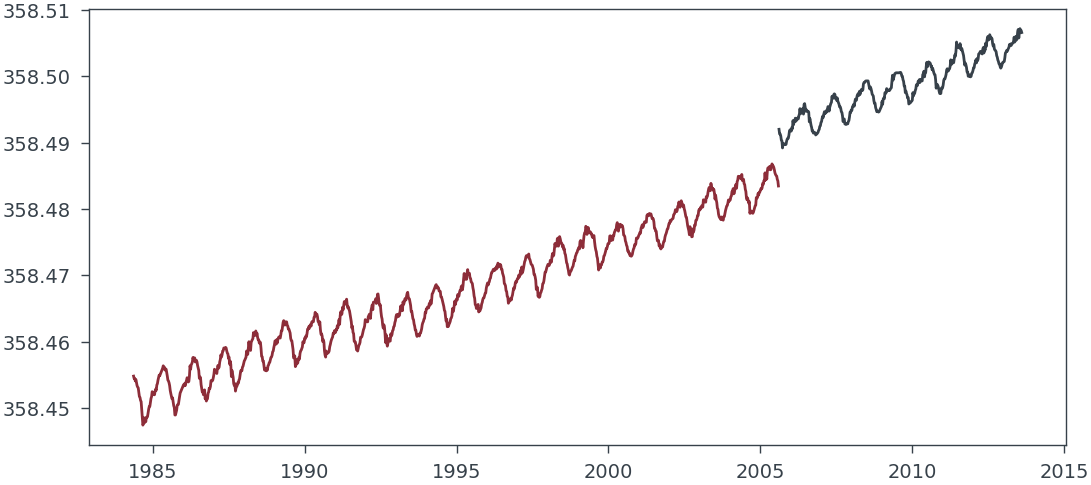

In [273]:
#plt.plot(X[:train_size], timeseries[:train_size])
plt.plot(X[:y_train_pred.shape[0]], y_train_pred[:,0,0].cpu().numpy())
plt.plot(X[y_train_pred.shape[0]:y_train_pred.shape[0]+y_test_pred.shape[0]], y_test_pred[:,0,0].cpu().numpy())

#plt.plot(X[train_size:], timeseries[train_size:])
#plt.plot(X[y_test_pred.shape[0]:], y_test_pred[:,0,0].cpu().numpy())

In [270]:
# Extrapolate 1000 steps into the future.
computed_values = []
with torch.no_grad():  # Disable gradient computation
    predicted_outputs = []
    input_tensor = X_test[0,:,0].cpu()
    for i in range(100):  # Replace 100 with the actual number of timesteps
        # print("input_tensor : pre: ", input_tensor.shape)
        # print("input:", input_tensor.numpy().reshape(1,lookback))
        if i == 0: 
            input_tensor = input_tensor.unsqueeze(0)
            input_tensor = input_tensor.unsqueeze(0)
        else: 
            input_tensor = input_tensor.unsqueeze(0)
        input_tensor = input_tensor.reshape((1, lookback, 1))
        # print("input_shape", input_tensor.shape)
        output_tensor = (loaded_model.to('cpu'))(input_tensor)
        predicted_output = output_tensor.squeeze(0).numpy()  
        # Convert output tensor to numpy array
        # print("predicted", predicted_output.reshape(1,lookback))
        #print("predicted output shape", predicted_output.shape)
        #print("predicted output", predicted_output[-1])
        #plt.plot(np.array(range(0, 52))* 0.192, predicted_output[0], label='Predicted')
        # plt.show()
        computed_values.append(predicted_output[:, -1])
        predicted_outputs.append(predicted_output)
        input_tensor = torch.tensor(predicted_output, dtype=torch.float32)#.unsqueeze(0)  # Use predicted output as input for next timestep
print("computed values", np.array(computed_values))

computed values [[358.49203 379.3734  381.54126 ... 388.6281  388.63718 388.64795]
 [358.4652  370.28055 372.31335 ... 387.43506 387.4389  387.44257]
 [358.4652  365.57068 367.42523 ... 387.14374 387.1456  387.14728]
 ...
 [358.4652  359.40723 360.1146  ... 372.87393 376.4431  380.49878]
 [358.4652  359.40723 360.1146  ... 376.08655 371.3143  370.67108]
 [358.4652  359.40723 360.1146  ... 386.71603 384.24274 379.97754]]


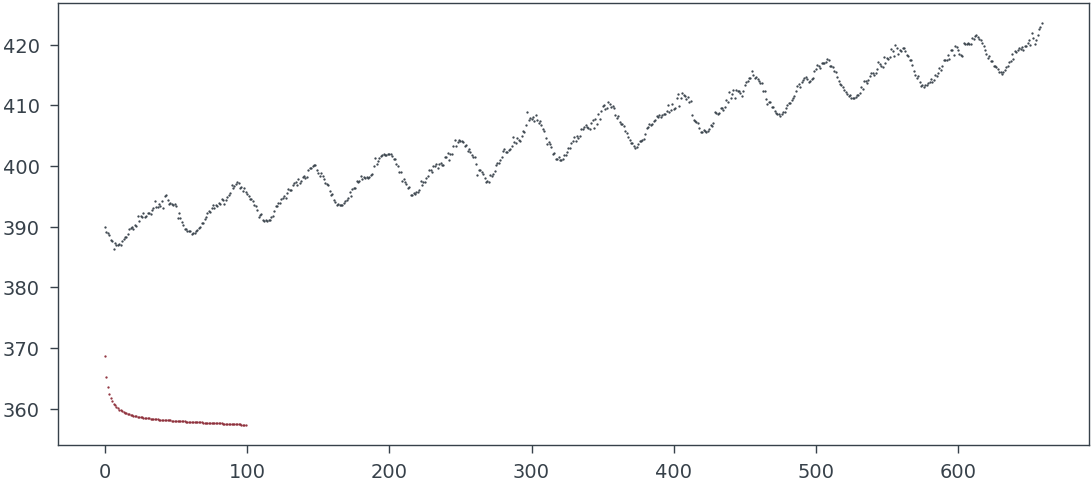

In [28]:
plt.scatter(np.array(range(0, len(computed_values))), computed_values, label='Predicted',s=.1)
plt.scatter(np.array(range(0, len(test))), test, label='Actual',s=.1)

## Train the model such that its RMSE on the train set (as defined above) is *smaller* than that of linear regression.


From the previous example we see that the linear regression is able to capture much of the trend in the climate data while failing to capture the 
seasonality of the data and other high frequency content. The RMSE of the linear regression  on the training set is given above and is less 
than 3.1. Linear regression achieves this with just two parameters the slope and the intercept. 


We split the sequential data into a test and train set, where we consider the training set to be the first 70% of the data while the validation/test set
to be the remaining 30% of the data. We train the LSTM on a window size of 52 to be approximately equal to the duration of an year, assuming that this 
window length will capture most of the seasonality in the data. RMSE is then computed on predictions of the LSTM on all the data shifted by a timestep. 





## Amend the plot above with the model's prediction on the testset `x` (not the train set!)

We now that we are able to use the LSTM to predict weekly ppm values, decide both plot the LSTM output 
and an interpolation of the output values. 

See below the for the plot of the interpolated values of LSTM output. 



# Summary

# References

*  MLP for time series forecasting: https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/
*  LSTM for time series prediction: https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/
*  LSTM:  https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
*  The Unreasonable Effectiveness of Recurrent Neural Networks:  http://karpathy.github.io/2015/05/21/rnn-effectiveness/
*  Radial Basis Functions https://deepai.org/machine-learning-glossary-and-terms/radial-basis-function#:~:text=What%20is%20a%20Radial%20Basis,denoted%20C%2C%20called%20a%20center.

### How to submit your work:

Export your answer into a pdf (for example using jupyter's `Save and Export Notebook as` feature in the `File` menu). Make sure to include all outputs, in particular plots. Also include your answer to the theory question, either by adding it as LaTeX code directly in the notebook, or by adding it as an extra page (e.g. a scan) to the pdf. Submit the exercise on Ilias, in the associated folder. **Do not forget to add your name(s) and matricel number(s) above!)**